In [1]:
from ect.optimization import MultimodalGenerator, ECTAntialiasOptimizer, snr, snr_sidelobe, l1dist
from matplotlib import pyplot as plt
from ect.helpers import Mode


2024-04-29 22:32:14.579 | DEBUG    | ect.maps.logpolar_new:logpolar:50 - Running logpolar transform in offset mode offset=5
2024-04-29 22:32:14.583 | DEBUG    | ect.maps.logpolar_new:logpolar:63 - Applying bilinear pixel mapping


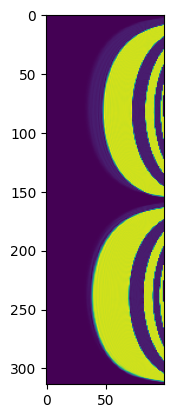

In [2]:
# modes = [Mode(10, 0, .2), Mode(15, 30, .4), Mode(25, 60, .6), Mode(35, 90, .8), Mode(50, 45, 1)] 
# modes = [Mode(25, 60, .6), Mode(35, 90, .8), Mode(50, 45, 1)]
modes = [Mode(100/x, 5, 1/x) for x in range(1, 40, 2)]
gen = MultimodalGenerator(modes, offset=5, dsize=(314, 100))
# gen = RandUnimodalGenerator(offset=5, dsize=(628, 200))
opt = ECTAntialiasOptimizer(gen, snr, offset=5, ect_offset=5)

plt.imshow(gen.generate())

In [3]:
import numpy as np
snr(np.ones((100,100)), np.ones((100,100)))

-120.0

In [4]:
r = opt.optim()

Current loss=-5.477
Current loss=-5.708
Current loss=-5.719
Current loss=-5.783
Current loss=-5.918
Current loss=-5.919
Current loss=-6.165
Current loss=-6.167
Current loss=-6.169
Current loss=-6.171
Current loss=-6.172
Current loss=-6.172


In [5]:
r

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: -6.172090723396274
        x: [ 5.731e-01  6.660e-01  2.500e-01]
      nit: 12
      jac: [ 8.843e-01  1.868e+00  0.000e+00]
 hess_inv: [[ 8.879e-01  2.498e-01  0.000e+00]
            [ 2.498e-01  7.028e-02  0.000e+00]
            [ 0.000e+00  0.000e+00  1.000e+00]]
     nfev: 511
     njev: 125

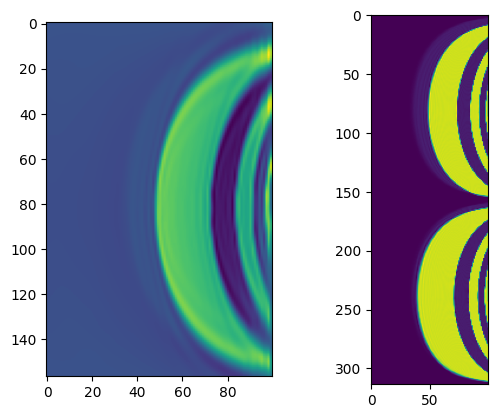

In [6]:
import cv2
inv = cv2.normalize(np.real(opt.inv), None, 1, 0, cv2.NORM_MINMAX)

plt.subplot(1,2,1)
plt.imshow(np.real(opt.inv))

plt.subplot(1,2,2)
plt.imshow(opt.image.image)

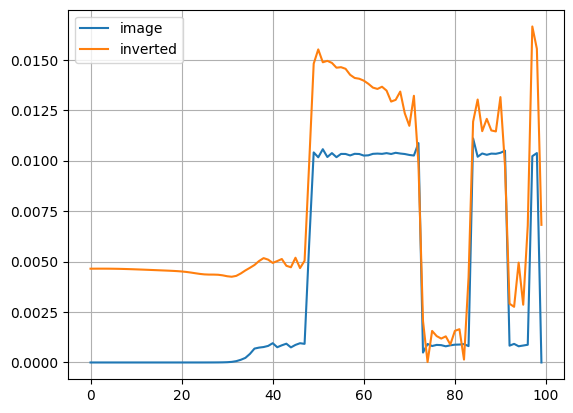

In [8]:
inorm = cv2.normalize(opt.image.generate(), None, 1, 0, cv2.NORM_L2)
invnorm = cv2.normalize(opt.inv, None, 1, 0, cv2.NORM_L2)

plt.plot(inorm[78, :])
plt.plot(invnorm[78, :])
plt.legend(["image", "inverted"])
plt.grid()

from ect.optimization import snr
from icecream import ic
# ic(snr(inorm, invnorm))